In [19]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

from cued_sf2_lab.familiarisation import load_mat_img, plot_image

In [20]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen)

In [21]:
# your code here
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')

X = lighthouse.copy()
#X = X - 128  # CANNOT DO THAT FOR jpegenc!!

qstep = 17
vlc, hufftab = jpegenc(X, qstep, opthuff=True)


print(vlc[:,1].sum())

#print(dict(zip(hufftab.huffval, hufftab.codes)))|
print(hufftab.huffval)

Forward 8 x 8 DCT
Quantising to step size of 17
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 63980
Bits for huffman table = 1424
63980
[  1   0   2   3  17  18   4  33  49  19  34  65  81  97 113   5  50  66
 129 145 161 240  20  35  51  82 114 146 162 177 193 209  67  98 130 178
 179 225  21  36  52  83  99 115 131 132 163 194 210 241  84 100 147 148
 195   6  68 133 164 196 211  69 116 117 149 180 226 227 242   7   8   9
  10  22  23  24  25  26  37  38  39  40  41  42  53  54  55  56  57  58
  70  71  72  73  74  85  86  87  88  89  90 101 102 103 104 105 106 118
 119 120 121 122 134 135 136 137 138 150 151 152 153 154 165 166 167 168
 169 170 181 182 183 184 185 186 197 198 199 200 201 202 212 213 214 215
 216 217 218 228 229 230 231 232 233 234 243 244 245 246 247 248 249 250]


This produces variable-length coded data in `vlc`, using quantisation step sizes of qstep.  To decode `vlc`, type:  `Z = jpegdec(vlc, qstep)`

Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 17
Inverse 8 x 8 DCT



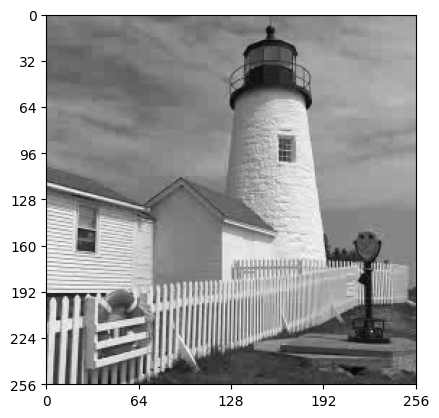

In [22]:
# your code here

Z = jpegdec(vlc, qstep=17, hufftab = hufftab) # We don't need hufftab? what is this sorcery
#Z = Z + 128

#fig, ax = plt.subplots()
#plot_image(Z)

## Going beyond JPEG and the DCT

If you have chosen the DCT as one of your energy compaction
methods then it is fairly straightforward to follow the JPEG
guidelines for coding the coefficients.  However if you have
chosen one of the other methods then a modified scanning strategy is required.

It has already been mentioned that the LBT (which is at the heart of the JPEG-XR standard) is often coded several sub-blocks at a time. We can make a smaller LBT ($4 \times 4$ is the default) look like a $16 \times 16$ DCT by using the `regroup(Yq, 4)` function within each $16 \times 16$ block of `Yq`. The functions `jpegenc` and `jpegdec` have already been written to do this if the `M` argument (which specifies the {\em coding} block size) is larger than the `N` argument (which specifies the DCT block size).

The DWT (which is the basis of the JPEG2000 standard) can also be re-arranged to make it look similar to a DCT. For instance, a 3-level DWT could be re-arranged into an $8 \times 8$ block $B$ using coefficients from the same
square spatial area:


> 4 values from level 3: $B3$ = [$UU_3$ $VU_3$; $UV_3$, $VV_3$]  
> 3 surrounding $2 \times 2$ blocks from level 2: $B2$ = [$B3$ $VU_2$; $UV_2$ $VV_2$]  
> 3 surrounding $4 \times 4$ blocks from level 1: $B$ = [$B2$ $VU_1$; $UV_1$ $VV_1$]

It is not possible to achieve this sort of grouping using the simple `regroup` function, so we have provided a more complicated function 
`dwtgroup(X,n)` which converts an n-level DWT sub-image set into blocks of size $N \times N$ (where $N = 2^n$) with the above type of grouping.  Try this
function on some small regular matrices (e.g. `np.arange(16*16).reshape(16, 16)`) to
see how it works. Note that `dwtgroup(X, -n)` reverses this grouping.

In [23]:
from cued_sf2_lab.jpeg import dwtgroup
# this is a nice trick to get an array of coordinates; use `display(x)` to check what this is doing
i, j = np.indices((8, 8))
x = np.rec.array((i, j))
#print(x)
#print("\n")
#print(dwtgroup(x, 2))


With these modified scanning strategies, the JPEG run-length / log amplitude coding can then be used for each vector in the same way as for the DCT coefficients. However, these scanning strategies are not optimal, and do not represent those outlined in the JPEG2000 and JPEG-XR standards.

You should write versions of `jpegenc` and `jpegdec` for
your chosen compression strategies and check the following:
1. The rms error (standard deviation) between the decoded and original
images should be the same as for the equivalent quantisation
strategies that were tested in the previous section on
centre-clipped linear quantisers.  No extra errors should be
introduced by the scanning or Huffman encode / decode operations.

2. The number of bits required to code an image should be comparable with
the value predicted from the entropy of the quantised coefficients (i.e.
within about 20%).  Note that it is possible to code with fewer bits than
predicted by the entropy because the run-length coding can take advantage of
clustering of non-zero coefficients, which is not taken account of in the
first-order entropy calculations.



# Converting their jpegenc into lbtenc

In [24]:
from simple_lbt_functions import (
    pot, dct, idct, ipot, dct_regroup, dct_reshape, lbt, ilbt, full_process_results)

from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.laplacian_pyramid import bpp

RMS = 1.1018356898983869e-13
Predict bits Y = 351240.68005232775


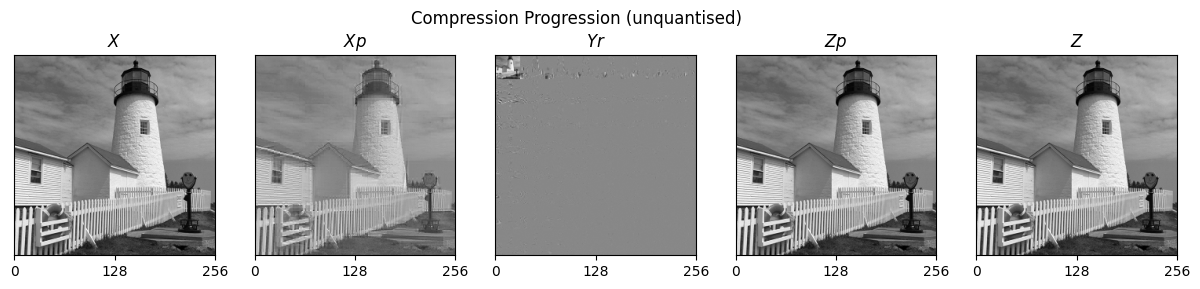

In [31]:
# Compression Progression (Quantised)

# DON"T KNOW WHY THIS DOESN"T WORK!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
#X = lighthouse - 128

X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
X = X - 128.0

